In [1]:
'''
Code was written for the Sign prediction in complex network :

'''

import networkx as nx
import math
import pylab as plt
import numpy as np 


In [2]:
def Draw_graph(G,file):
    pos = nx.spring_layout(G,k=0.25,scale=4)#,k=5/math.sqrt(G.order()),iterations=50)
    # k controls the distance between the nodes and varies between 0 and 1
    # iterations is the number of times simulated annealing is run
    # default k =0.1 and iterations=50
    plt.figure(1,figsize=(30,30))
    #plt.figure(1,figsize=(12,12))
    plt.xlim(-5.5,5.5)
    plt.ylim(-5.5,5.5)
    # scale=3)

    nx.draw(G, pos,font_size=8)

    edge_labels = nx.get_edge_attributes(G,'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels  =edge_labels,font_size=8 )
    plt.show()
    plt.savefig(file)
    

In [3]:
def convert_to_undirected(G):
    edges=[node for node in G.edges(data=True)]
    undirected_G= G.to_undirected()
    return undirected_G

In [4]:
def read_graph_from_file(file):
    i=0;
    for l in file:
        #print(l)
        i+=1;
        #for slashdot
        #ls = l.split('') #strip().
        #for epinion
        ls = l.strip().split('\t') #.
        w=float(ls[2])
        if w < -0.1:
            s='-'
        elif  w > 0.2:
            s='+'
        else:
            s='*'
        G.add_edge(ls[0], ls[1], label=s)  ## the weight should already be in the range of -1 to 1
        #if i== 200:
         #  break;
    f.close()
    return G

In [5]:
def read_graph_from_Wiki(file, size):
    i=1;    
    print(file)
    while 1:
       
        if (i > size):
            break
        line = file.readline()
        if not line:
            break
            
        ls = line.strip().split('\t') #.
        if ls[0]=='E': #and ls[1] == '1':
            line = file.readline()
            line = file.readline()
            
            inls= line.strip().split('\t')
            if (inls[0]=='U'):
                u = inls[1]
            tmpline = file.readline()
            
            tmpline = file.readline()
            tmpls=tmpline.strip().split('\t')
            #print(tmpls)
            while tmpls[0] =='V':
                w=float(tmpls[1])
                if w < -0.1:
                    s='-'
                elif  w > 0.2:
                    s='+'
                else:
                    s='*'
                G.add_edge(tmpls[2], u, label=s)  
                i+=1
                tmpline = file.readline()
                tmpls=tmpline.strip().split('\t') 
        
    return G

In [6]:
def calculate_in_similarity(G,u,v,w):
    if(len(w) <1):
        return 0.0
    sim_pos=0.0  
    counter=0
    for node in w:
        #print (node)
        sim_pos += similarity_in(G,v,node)
        counter +=1
        
    sim_pos =sim_pos / counter
    return sim_pos

In [7]:
def similarity_in(G,v,wi):
    Vin = G.predecessors( v)
    Win = G.predecessors( wi)
    i=0
    numinator=0.0
    denuminator_v=0.0
    denuminator_w=0.0
    for node in Vin:
        if node in Win:
          if (G.get_edge_data(node, v)['label']=='+' or G.get_edge_data(node, v)['label']=='-') and\
            (G.get_edge_data(node, wi)['label']=='+' or G.get_edge_data(node, wi)['label']=='-'):
            if G.get_edge_data(node, v)['label']== G.get_edge_data(node, wi)['label']:
                #print('YES')
                numinator     +=1
            else:
                #print('NO')
                numinator     -=1
            denuminator_w +=1        
    if((denuminator_w)>0.0):
        return numinator/(denuminator_w*denuminator_w)
    else:
        return 0.0


In [8]:
def calculate_out_similarity(G,u,v,w):
    if(len(w) <1):
        return 0.0
    sim_pos=0.0  
    counter=0
    for node in w:
        #print (node)
        sim_pos += similarity_in(G,v,node)
        counter +=1
        
    sim_pos =sim_pos / counter
    return sim_pos

In [9]:
def similarity_out(G,v,wi):
    Vin = G.predecessors( v)
    Win = G.predecessors( wi)
    i=0
    numinator=0.0
    denuminator_v=0.0
    denuminator_w=0.0
    for node in Vin:
        if node in Win:
          if (G.get_edge_data(node, v)['label']=='+' or G.get_edge_data(node, v)['label']=='-') and\
            (G.get_edge_data(node, wi)['label']=='+' or G.get_edge_data(node, wi)['label']=='-'):
            if G.get_edge_data(node, v)['label']== G.get_edge_data(node, wi)['label']:
                #print('YES')
                numinator     +=1
            else:
                #print('NO')
                numinator     -=1
            denuminator_w +=1        
    if((denuminator_w)>0.0):
        return numinator/(denuminator_w*denuminator_w)
    else:
        return 0.0


In [10]:
def graph_mining(G,ug):
    #print(edges)
    outFile = open("C:/db/wekafile_Wiki.csv", "w+")
    feature_vector=""
    undirected_G=ug
    NORu = {}
    NIRu = {}
    sim_pos_in_v_u={}
    sim_neg_in_v_u={}
    sim_pos_out_v_u={}
    sim_neg_out_v_u={}
    NTR_u_v={}
    nodes_info = {}
    W_pos_out = {}
    W_neg_out = {}
    W_pos_in = {}
    W_neg_in = {}
    pos_outdegr =0.0
    pos_indegr=0.0
    edges = nx.edges(G)
    outFile.write("col1,"+"col2,"+"col3,"+"col4,"+"col5,"+"col6,"+"col7, Class"+"\n")
    alledges_num= G.number_of_edges()
    print('shape is' ,alledges_num)
    nc=0
    for edge in edges:
        classlabel=""
        nc+=1
        if nc % 1000 ==0:
            print(nc,' node from ' ,alledges_num)
        if G.get_edge_data(edge[0],edge[1])['label'] == '+':
            classlabel='positive'
        elif  G.get_edge_data(edge[0],edge[1])['label'] == '-':
            classlabel='negative'
        else:
                classlabel='neutral'
                continue
        u=edge[0]
        v=edge[1]
        NORu={}
        NIRv = {}
        neg_indegr=0.0;
        neg_outdegr=0.0;        
        in_node={} 
        out_node={} 
        #print (undirected_G.edges)
        #Find all predecessor node of v (from (u,v) edge)called w and calculate positive input and negative input of (w,v) '''
        #where W_xxx_out is the set of nodes which give positive links to v        
        if (v in W_pos_out)==False:
                in_node=  G.predecessors(v)
                tmpdic1=[]
                tmpdic2=[]
                for node in in_node:
                    if G.get_edge_data(node, v)['label'] == '+':
                        tmpdic1.append(node)
                    elif G.get_edge_data(node,v)['label'] == '-':
                        tmpdic2.append(node)
                W_pos_out[v]=tmpdic1
                W_neg_out[v]=tmpdic2
        #where W_xxx_in is the set of nodes u gives xxx links to 
        #Find all successors node of u (from (u,v) edge)called w and calculate positive input and negative input of (w,v) '''
        if (u in W_pos_in)==False:
                out_node=  G.successors( u)
                tmpdic1=[]
                tmpdic2=[]
                for node in out_node:                
                    if G.get_edge_data(u, node)['label'] == '+':
                        tmpdic1.append( node)
                    elif G.get_edge_data( u,node)['label'] == '-':
                        tmpdic2.append( node)
                W_pos_in[u]=tmpdic1
                W_neg_in[u]=tmpdic2
        #print (W_pos_in[u])
        
        
        sim_pos_in_v_u[edge]=calculate_in_similarity(G,u,v,W_pos_in[u])
        sim_neg_in_v_u[edge]=calculate_in_similarity(G,u,v,W_neg_in[u])
        
        sim_pos_out_v_u[edge]=calculate_out_similarity(G,u,v,W_pos_out[v])
        sim_neg_out_v_u[edge]=calculate_out_similarity(G,u,v,W_neg_out[v])
#calculate node degree features including NOR(u) and NIR(v) from edge (u,v)  

        outedges= G.out_edges(u,data=True)
        signed_degr_u=0.0
        
        for e in outedges:
           #print (e)
           #print(e[2]['label'])
           if e[2]['label'] == '+':
                pos_outdegr +=1
                signed_degr_u +=1
                #print(e[2])
           elif e[2]['label'] == '-':
                neg_outdegr +=1
                signed_degr_u +=1           
                #print(e[2])
                
        signed_degr_v=0           
        inedges= G.in_edges(v,data=True)
        for e in inedges:
           #print (e)
           #print(e[2]['label'])
           if e[2]['label'] == '+':
                pos_indegr +=1
                signed_degr_v +=1
                #print(e[2])
           elif e[2]['label'] == '-':
                neg_indegr +=1
                signed_degr_v +=1           
                #print(e[2]) 
        #print(signed_degr)
        if signed_degr_u != 0.0:
             NORu[edge] = neg_outdegr/ (signed_degr_u)             
             #print('ok')
        else:
             NORu[edge] = 0.0
                
        if signed_degr_v != 0:
            NIRv[edge] = neg_indegr/  (signed_degr_v)
        else: 
             NIRv[edge] = 0.0
             #print('NOK')        
                
# Triad features, including negative triad ratio. According to both Structural Balance Theory and Status Theory, 
# the structural information of links influences the sign prediction in signed social networks. We therefore use 
# negative triad ratio to represent the structural information of the link.   

        cn = nx.common_neighbors(undirected_G,u,v)
        diff=0.0
        cnc=0.0 
        
        for nb in cn:          
          #print (undirected_G.get_edge_data(e[0], nb))
          if undirected_G.get_edge_data(u, nb)['label'] != undirected_G.get_edge_data(v, nb)['label']:
                 diff +=1
                 #print (nb)
          cnc +=1
        #print (diff)
        if cnc > 0:
            NTR_u_v[edge] = diff/cnc
        else:
            NTR_u_v[edge]=0.0                   
        
        
        #print(feature_vector)
        #print(sim_pos_in_v_u[edge])
        #print(sim_neg_in_v_u[edge])
        #print(sim_pos_out_v_u[edge])
        #print(sim_neg_out_v_u[edge])
        #print("{:10.4f}".format(sim_pos_in_v_u[edge]))
        feature_vector = "{:6.4f}".format(sim_pos_in_v_u[edge])+","+"{:6.4f}".format(sim_neg_in_v_u[edge])+","+"{:6.4f}".format(sim_pos_out_v_u[edge])+","+"{:6.4f}".format(sim_neg_out_v_u[edge])+\
        ","+"{:6.4f}".format(NTR_u_v[edge])+","+"{:6.4f}".format(NORu[edge])+","+"{:6.4f}".format(NIRv[edge])+","+classlabel+"\n"
        
        #if (classlabel==1 or classlabel==-1):
        outFile.write(feature_vector)
        #print (feature_vector)
        #print(NTR_u_v[edge])
        #print(NORu[edge])
        #print(NIRv[edge])
    outFile.close()   

In [12]:
# Main function of my program , 
G = nx.DiGraph()
#feature vector cintain 7 feature from 3 category which include node similarity, balance and status theory, node statistics
##Feature vector {(u,v):features}
def  Add_feature_instances (edge, features):
    if edge in feature_vector:
        feature_vector[edge]= features
feature_vector={}
#f = open("C:/db/wikiElec.ElecBs3.txt", "r")

#f = open("C:/db/EpinionNet.csv","r")
#f = open("C:/db/EpinionNet.csv", "r")
#f = open("C:\\db\\soc-sign-epinions.txt\\soc-sign-epinions.txt","r")
f = open("C:\\db\\wikiElec.ElecBs3.txt","r", encoding="latin-1")
#G=read_graph_from_file(f)
G=read_graph_from_Wiki(f,size=1000000)

print('file readed')
undirected_G = convert_to_undirected(G)
graph_mining(G,undirected_G)
#Draw_graph(G,'e:/file1.png')
#uG=convert_to_undirected(G)
#Draw_graph(uG,'e:/file1')
#coming_from = G.predecessors('')
#nx.to_edgelist(G)


<_io.TextIOWrapper name='C:\\db\\wikiElec.ElecBs3.txt' mode='r' encoding='latin-1'>
file readed
shape is 110087
1000  node from  110087
2000  node from  110087
3000  node from  110087
4000  node from  110087
5000  node from  110087
6000  node from  110087
7000  node from  110087
8000  node from  110087
9000  node from  110087
10000  node from  110087
11000  node from  110087
12000  node from  110087
13000  node from  110087
14000  node from  110087
15000  node from  110087
16000  node from  110087
17000  node from  110087
18000  node from  110087
19000  node from  110087
20000  node from  110087
21000  node from  110087
22000  node from  110087
23000  node from  110087
24000  node from  110087
25000  node from  110087
26000  node from  110087
27000  node from  110087
28000  node from  110087
29000  node from  110087
30000  node from  110087
31000  node from  110087
32000  node from  110087
33000  node from  110087
34000  node from  110087
35000  node from  110087
36000  node from  1100

<_io.TextIOWrapper name='C:\\db\\wikiElec.ElecBs3.txt' mode='r' encoding='latin-1'>


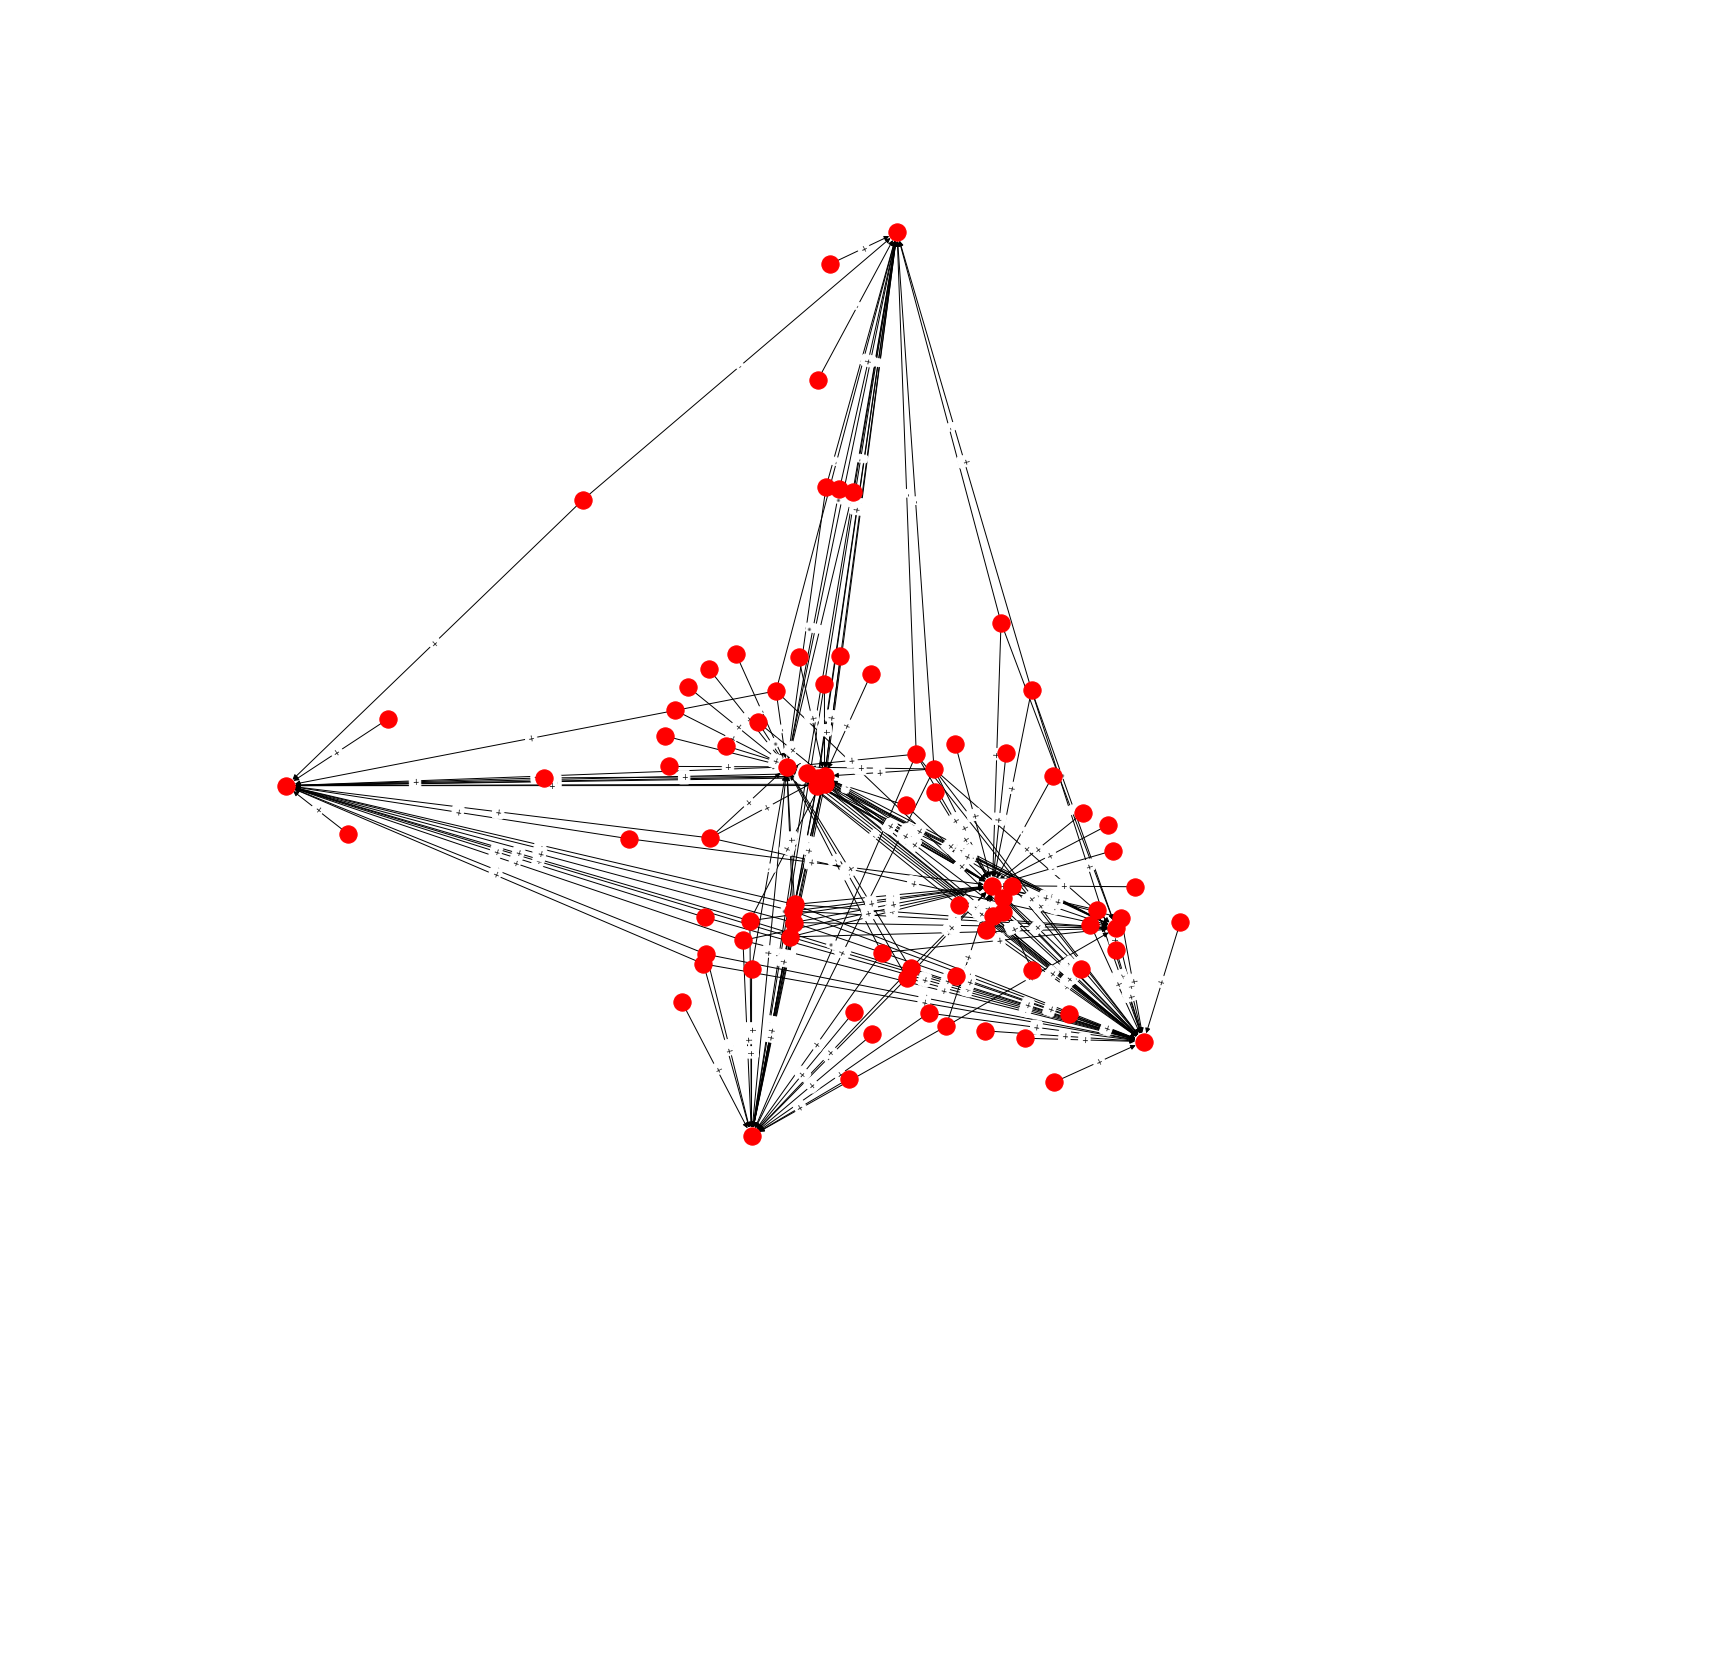

<Figure size 432x288 with 0 Axes>

In [13]:
# procedure for drawing a partition of graph with fewer node
G = nx.DiGraph()
f = open("C:\\db\\wikiElec.ElecBs3.txt","r", encoding="latin-1")
#G=read_graph_from_file(f)
G=read_graph_from_Wiki(f,size= 200)
Draw_graph(G,'e:/file1.png')
